Yes so this is an effect of bad restart read out because I tried to progress onto timestep 14 and it was okay so it confirms that that was an issue with the restart 

So I don't have the ic_sink_restart file, that might explain it,now I just copied it from ic_sink: 

Okay now it looks like it is reading in the proper thing 

So nothing is drifting off now !! 

# Mass accretion rate onto sink 

In [1]:
%pylab inline
import glob 
import plot_is

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /project/projectdirs/astro250/doris/ramses/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses/trunk/ramses/bin


In [14]:
msink=[]
end_timestep = 32
for timestep in np.arange(1,end_timestep): 
    sink_info = np.loadtxt("output_{0}/sink_{0}.info".format(str(timestep).zfill(5)),comments="=",skiprows=4)
    msink.append(sink_info[1])

In [15]:
rho_c = 1.1e-19
G = 6.67e-8
a  = 28730.5#in cm/s from sqrt(kT/m) where T = 10K
delta_tout=0.1
r_to_xi_factor = sqrt(4*pi*rho_c*G)/a
t_to_tau_factor = sqrt(4*pi*G*rho_c)
l_scale = 4.947e16 #code units --> cgs conversion 
t_scale = 1.95482e12
M_to_m_factor = G*sqrt(4*pi*G*rho_c)/a**3
M_sun =  1.9891e33 #grams
print "r_to_xi_factor:", r_to_xi_factor
print "t_to_tau_factor: ",t_to_tau_factor
print "M_to_m_factor: ", M_to_m_factor

r_to_xi_factor: 1.05686863016e-17
t_to_tau_factor:  3.03643641787e-13
M_to_m_factor:  8.54005117358e-34


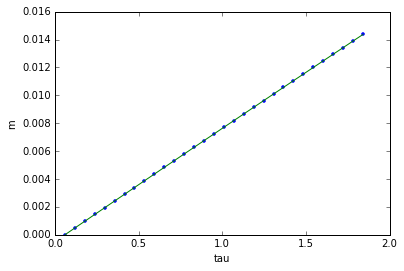

In [51]:
dt =  delta_tout*t_scale #seconds  #uniform timestep outputs [0.0618 Myrs]
m = np.array(msink)*M_sun*M_to_m_factor
tstep  = np.arange(1,end_timestep)
tau = tstep*dt*t_to_tau_factor
plt.plot(tau,m,'.')
plt.plot(tau,m)
plt.xlabel("tau")
plt.ylabel("m")

In [52]:
dt

195482000000.0

In [55]:
dt = (np.roll(tau,-1)-tau)[1]

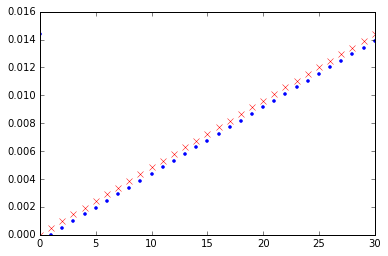

In [54]:
plt.plot( np.roll(m,1),'.')
plt.plot(m,'x',color="red")

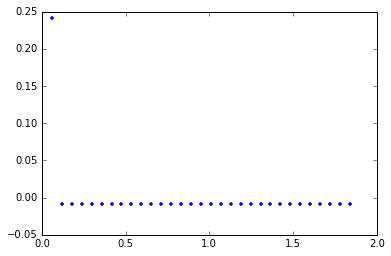

In [56]:
plt.plot(tau,dm/dt,'.')

In [57]:
dm

array([ 0.01436172, -0.00048799, -0.00048245, -0.00048587, -0.00048151,
       -0.00048493, -0.00048059, -0.00048401, -0.00048355, -0.00047923,
       -0.00048265, -0.00047835, -0.00048177, -0.00047749, -0.00048091,
       -0.00047665, -0.00048007, -0.00047582, -0.00047925, -0.00047502,
       -0.00047846, -0.00047807, -0.00047386, -0.0004773 , -0.00047312,
       -0.00047657, -0.0004724 , -0.00047586, -0.00047171, -0.00047517,
       -0.00047104])

In [58]:
dt

0.059356866383768123

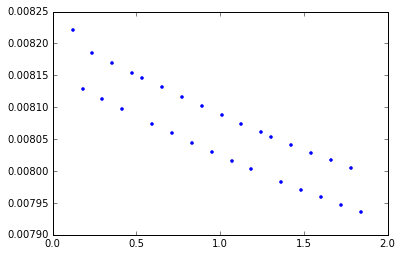

In [59]:
dm = np.roll(m,1)-m
Mdot =  (dm/dt)#[1:-1] #M_sun/second
plt.plot(tau[1:],-Mdot[1:],'.')

In [42]:
-Mdot

array([ -7.34682391e-14,   2.49635822e-15,   2.46801052e-15,
         2.48548834e-15,   2.46321809e-15,   2.48068896e-15,
         2.45849518e-15,   2.47597039e-15,   2.47364152e-15,
         2.45155202e-15,   2.46904461e-15,   2.44705070e-15,
         2.46454329e-15,   2.44262758e-15,   2.46014624e-15,
         2.43830875e-15,   2.45584479e-15,   2.43410288e-15,
         2.45165630e-15,   2.43000998e-15,   2.44758078e-15,
         2.44557343e-15,   2.42407484e-15,   2.44168040e-15,
         2.42026870e-15,   2.43791771e-15,   2.41660160e-15,
         2.43428537e-15,   2.41305616e-15,   2.43078337e-15,
         2.40965844e-15])

This looks like effects of rolling systematics but its not, you only get this because you are at 10^-15 level. 
In any case the mass accretion rate is approximately constant which doesn't agree with Fig 3 .'